# Review Analysis for Reputation Assignment
## Abhishek Choudhury
### choudhury.abhishek29@gmail.com | Mobile : +1(669)247-9366

Lets import the pandas for data analysis.

In [1]:
import pandas as pd
import numpy as np

Importing the data

In [2]:
reviews = pd.read_csv("reviews.csv");
categories = pd.read_csv("categories.csv");

Merge the two data sets to consolidate the ratings, reviews and sentiments 

In [3]:
all_data = pd.merge(reviews, categories, on='review_id', how='left')

In [4]:
all_data.head(5)

,location_id,review_id,date,rating,comment,category,sentiment
0,4962_661,GOOGLE_PLACES_0,2016-10-13 07:00:00,1.0,Very bad service. They don't follow a systemat...,maintenance_service,-1.0
1,4962_661,GOOGLE_PLACES_1,2017-04-02 07:00:00,5.0,Darren and Mo were awesome in putting me in my...,overall_experience,1.0
2,4962_661,GOOGLE_PLACES_2,2016-10-01 07:00:00,5.0,My salesman Digsby was great and very helpful ...,buying_a_car,1.0
3,4962_661,GOOGLE_PLACES_2,2016-10-01 07:00:00,5.0,My salesman Digsby was great and very helpful ...,customer_service,1.0
4,4962_661,GOOGLE_PLACES_3,2017-03-28 07:00:00,2.0,"As any other dealership, they will try to rip ...",buying_a_car,-1.0


In [5]:
pos_sent = all_data[all_data['sentiment']==1]

In [6]:
pos_sent_count = pos_sent.groupby(['location_id', 'category'])['sentiment'].count().reset_index()
pos_sent_count = pos_sent_count.rename(columns={'sentiment': 'pos_count'})

In [7]:
all_data_count = all_data.groupby(['location_id', 'category'])['sentiment'].count().reset_index()
all_data_count = all_data_count.rename(columns={'sentiment': 'count'})

In [8]:
x = pd.merge(all_data_count, pos_sent_count, on=['location_id','category'], how='left')
x = x.fillna(0)
x['per_pos_sent'] = x['pos_count']/x['count']

In [9]:
x.head(10)

,location_id,category,count,pos_count,per_pos_sent
0,4962_1017,buying_a_car,3,3.0,1.000000
1,4962_1017,competence,3,3.0,1.000000
2,4962_1017,customer_service,9,9.0,1.000000
3,4962_1017,financing_a_car,1,1.0,1.000000
4,4962_1017,leasing_a_car,1,1.0,1.000000
5,4962_1017,likely_to_recommend_return,1,1.0,1.000000
6,4962_1017,maintenance_service,11,11.0,1.000000
7,4962_1017,overall_experience,7,6.0,0.857143
8,4962_1017,pricing,3,3.0,1.000000
9,4962_1017,sales_tactics,2,2.0,1.000000


We would need the average rating for each location.

In [10]:
all_data_avg_rating = all_data.groupby(['location_id'])['rating'].mean().reset_index()

In [11]:
all_data_avg_rating.ix[all_data_avg_rating['location_id'] == '4962_248']['rating']

22    4.728814
Name: rating, dtype: float64

For comparing the two locations, I would be assigning category wise score to both the locations. For this, I first calculate the percentage of people who have left a review with positive sentiment for that category. Then multiply this with the average rating for that location. This way, each category gets assigned a score based on the average rating.
The reason behind calculating the % of people who left a positive sentiment is because, the number of reviews differ for both the locations. If we take a cumulative sentiment, the difference is huge, thus biasing the decision.

In [12]:
pos_sent_248_956 = x[x['location_id'].isin(['4962_248','4962_956'])]
pos_sent_248_956['avg_rating'] = np.where(pos_sent_248_956['location_id']=='4962_248', 
                                     all_data_avg_rating.ix[all_data_avg_rating['location_id'] == '4962_248']['rating'],
                                     all_data_avg_rating.ix[all_data_avg_rating['location_id'] == '4962_956']['rating'])
pos_sent_248_956['score'] = pos_sent_248_956['per_pos_sent']*pos_sent_248_956['avg_rating']

C:\Users\achou\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\achou\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
pos_sent_248_956.head(10)

,location_id,category,count,pos_count,per_pos_sent,avg_rating,score
250,4962_248,administration,3,3.0,1.000000,4.728814,4.728814
251,4962_248,buying_a_car,18,18.0,1.000000,4.728814,4.728814
252,4962_248,competence,14,14.0,1.000000,4.728814,4.728814
253,4962_248,customer_service,39,36.0,0.923077,4.728814,4.365059
254,4962_248,financing_a_car,4,4.0,1.000000,4.728814,4.728814
255,4962_248,getting_an_appointment,1,1.0,1.000000,4.728814,4.728814
256,4962_248,likely_to_recommend_return,11,11.0,1.000000,4.728814,4.728814
257,4962_248,maintenance_service,34,26.0,0.764706,4.728814,3.616152
258,4962_248,overall_experience,28,27.0,0.964286,4.728814,4.559927
259,4962_248,pricing,2,1.0,0.500000,4.728814,2.364407


Importing Seaborn for plotting the scores for the two locations

In [14]:
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


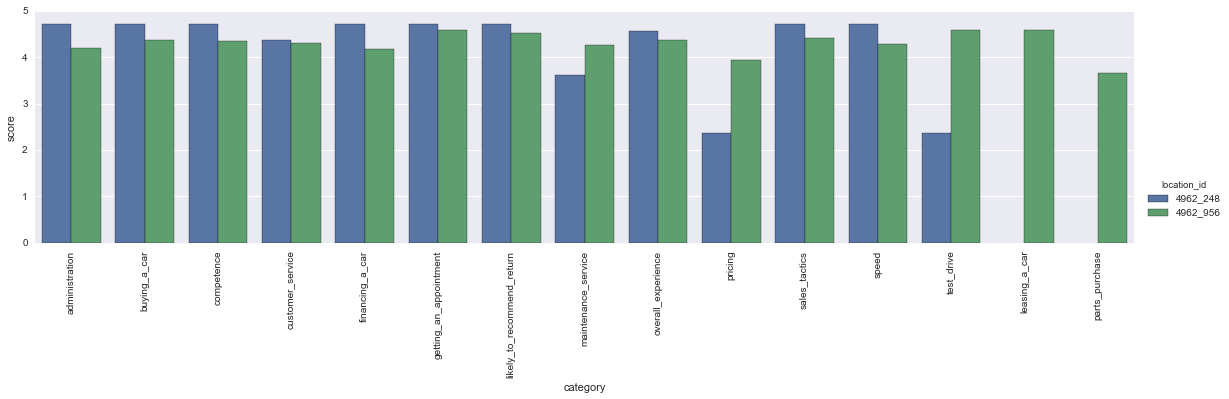

In [15]:
g = sns.factorplot(x="category", y="score",aspect=4, data=pos_sent_248_956, hue="location_id", kind="bar" )
g.set_xticklabels(rotation=90)

##### 1. Lets consider, Location 4962_248 : A Location 4962_956 : B
<br>
From the data we have found out that location A has very few number of reviews as compared to location B. But if we take a look at the scores for both the location, we see that other than administration, test drive, car leasing and parts purchasing, location A has higher scores. We may consider this location to be a smaller dealer who is just into selling cars as compared to location B which seems to be expanding its services e.g leasing cars and selling parts. But on the other hand, Location A seems to be highly focussed on maintaining their sales and customer relation by maintaining customer relations through commendable customer service, ease in getting an appointment and other practices. They are also more likely to be recommended to their customers' friends due to their better service.
<p>
If we consider the category 'buying_a_car', we see the score for the location 4962_248 is higher. Thus my recommendation would be Location 4962_248.

In [16]:
all_data_avg_pos_sent = x.groupby(['location_id'])['per_pos_sent'].mean().reset_index()

In [38]:
loc_scores = pd.merge(all_data_avg_pos_sent, all_data_avg_rating, on='location_id', how='left')

##### 2. a) Rank for the 100 locations.
For ranking the locations, similar to previous score, I have assigned a score to each location. This time though, since each review gets categorized into multiple categories, first I have calculated the percentage of the reviews with a positive sentiment for each category. Then I have taken a mean of the categories for each location. The score is a product the average rating of a location and average of % of people who left a review with a positive sentiment score.

In [18]:
loc_scores['score'] = loc_scores['per_pos_sent']*loc_scores['rating']
loc_scores.sort(['score'], ascending=0)

C:\Users\achou\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,location_id,per_pos_sent,rating,score
81,4962_837,1.000000,5.000000,5.000000
90,4962_918,1.000000,4.935484,4.935484
47,4962_495,1.000000,4.920000,4.920000
2,4962_131,0.968041,4.969095,4.810289
45,4962_484,0.988457,4.810526,4.754997
70,4962_70,0.983095,4.824468,4.742910
75,4962_772,0.969550,4.877907,4.729373
43,4962_435,0.974188,4.824228,4.699706
1,4962_114,0.977199,4.741007,4.632907
97,4962_976,1.000000,4.617647,4.617647


##### 2. b) Problem with the ranking
One problem with the ranking is if a location has a very few reviews and it gets categorized in very few categories. Score for such location may turn out to be as low as 0.

For finding the importance of categories, first we need to create dummy variables for each category and find their corelation to rating.

In [19]:
dummies = pd.get_dummies(all_data[['category']], prefix='cat')

In [20]:
cat_rating = pd.concat([all_data, dummies], axis=1)

##### 3. a) Rank the categories in order of importance

Assumption : By 'Significance', I am considering the importance of a category and how many times a review gets categorized into that category. 

For finding the importance of each category, I have considerd the mean of sentiment for each of the category. The mean gives me the weight of each category regarding it has been categorized with a positive/negative/neutral sentiment, and how many times.

In [22]:
cat_rating.groupby(['category'])['sentiment'].mean().reset_index().sort(['sentiment'], ascending= 0)

C:\Users\achou\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,category,sentiment
7,likely_to_recommend_return,0.957752
13,speed,0.938500
9,overall_experience,0.918941
12,sales_tactics,0.885865
2,competence,0.880795
3,customer_service,0.880078
1,buying_a_car,0.873927
6,leasing_a_car,0.858537
0,administration,0.796774
8,maintenance_service,0.789740


From the above categorization, the most important category seems to be <i>'likely_to_recommend_return'</i>. Recommendation from friends help increase the number of customers for a location.

##### 3. b) Impact of a category on the rating
For finding the impact of a particular category on the star rating, we need to calculate the correlation between the rating and the sentiment of each category.

In [23]:
arr_cor = []
for cat in all_data['category'].unique():
    if(cat is not NaN):
        temp = all_data[all_data['category']==cat]
        tp = []
        tp.append(cat)
        tp.append(temp.corr().ix[1,0])
        arr_cor.append(tp)
    
df_corr = pd.DataFrame(arr_cor)
df_corr.columns=['category','correlation']

In [24]:
df_corr.sort(['correlation'], ascending=0)

C:\Users\achou\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,category,correlation
1,overall_experience,0.447317
0,maintenance_service,0.386089
3,customer_service,0.351204
12,financing_a_car,0.349925
2,buying_a_car,0.347218
10,test_drive,0.346611
13,leasing_a_car,0.345211
6,likely_to_recommend_return,0.297144
5,competence,0.292535
9,administration,0.261450


By looking at the correlation between star rating and the different categories, we notice that sentiments for <i>overall_experience</i> is the most positively correlated. Thus, the ratings grow higher with more reviews getting positive score for overall experince category.

##### 3. c) Three Categories I would choose : 
<ul>
<li><i>overall_experience</i></li>
<li><i>maintenance_service</i></li>
<li><i>financing_a_car</i></li>
</ul>
<br>
Because these are the three categories which effects the ratings most and something which can be improved. The more these increase, the better is the rating.

##### 4. Identify important words for a location
Identifying important keywords for a location gives us a quick review. We dont need to go through each of the reviews.<br> 
<u><b>For Individual Words:</b></u>
For identifying keywords from all the reviews, first we need to seggregate all the reviews in separate documents for each location. Then we remove all the stop words from these seggregated reviews. Once done, we can use <i>Term Frequency</i> for finding the important words. Also, if we want to see the occurence of these words accross different locations, we can create a <i>Term Frequency, Inverse Document Frequency(TF-IDF)</i> matrix. It is a way to score the importance of words in a document based on how frequently they appear across multiple documents.
<br>
<u><b>For Phrases:</b></u>
Individual words at times are confusing. Some words may mean one thing when considered individually, but can mean toatlly something else when used in a phrase. To identify phrases which may describe a location, we need to club words which tend to occur together. This can be done by using <i>nGrams</i>. The length of phrases can be adjusted to whatever we like. Phrases like 'quick service', 'long waiting time' etc. gives us a quick review for a location.

##### 5. Lets gather the data for the location 4962_580

In [37]:
all_4962_580 = all_data[all_data['location_id'] == '4962_580']

In [26]:
all_4962_580 = all_4962_580.dropna()

Since we are dealing with reviews, we would like to see which words and phrases occur multiple times and what do they mean. This will give us a brief idea of what people are talking about this location.

In [27]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [28]:
rev = all_4962_580['comment'].unique()

In [29]:
text = ""
for r in rev:
    text = text+" "+r

In [30]:
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(text)
filtered_sentence = [w for w in word_tokens if not w in stop_words]

In [31]:
filtered_sentence = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

In [32]:
wordcloud = WordCloud().generate(text)

(-0.5, 399.5, 199.5, -0.5)

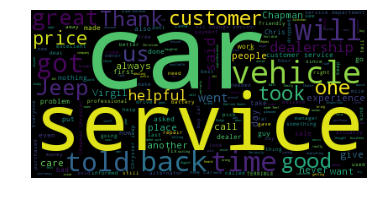

In [33]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

The words shown above in the wordcloud are the most used words in the reviews for the location.
But these words individually are misleading. So we create bigrams to understand meaning of phrases in the text. 

In [34]:
from nltk.collocations import TrigramCollocationFinder

In [35]:
finder = TrigramCollocationFinder.from_words(word_tokenize(text))
ngram = finder.ngram_fd
temp=[]
for n in ngram:
    tp=[]
    tp.append(n)
    tp.append(ngram[n])
    temp.append(tp)

ngram_freq = pd.DataFrame(temp)
ngram_freq.columns=['ngram','frequency']

In [36]:
ngram_freq.sort(['frequency']).head(10)

C:\Users\achou\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,ngram,frequency
0,"(Vince, who, got)",1
3987,"(one, ., Good)",1
3986,"(have, a, LAME)",1
3985,"(be, stressful, but)",1
3984,"(process, was, a)",1
3983,"(of, the, tires)",1
3982,"(been, a, customer)",1
3981,"(theu, tell, you)",1
3980,"(when, the, did)",1
3979,"(while, ``, customers)",1


The n-grams help us understand phrases in the reviews. For the location 4962_580, reviews seem to have mixed reactions.
A few phrases mentioning good things about the location are :  
<ul>
<li><i>(took, great, care)</i></li>
<li><i>(good, customer, service)</i></li>
<li><i>(went, extra, mile)</i></li>
<li><i>(salespeople, well, trained)</i></li>
</ul>

A few phrases mentioning bad things about the location are :  
<ul>
<li><i>(feel, like, idiot)</i></li>
<li><i>(money, care, nothing)</i></li>
<li><i>(suck, keeping, word)</i></li>
<li><i>(made, feel, uncomfortable)</i></li>
</ul>